In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import astropy
from astropy import units as u
from astropy import constants as const

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Final-Project/Pleiades_Cluster.csv")
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [3]:
gmag=np.asarray(df['gmag']) #Apparent magnitude

In [4]:
ra=np.asarray(df['ra'])#Right Ascension

In [5]:
dec=np.asarray(df['dec'])#Declination

In [6]:
plx=np.asarray(df['plx'])#parralax

In [7]:
bp_rp=np.asarray(df['bp_rp'].dropna())#color

In [8]:
lum_val=np.asarray(df['lum_val'].dropna())#luminosity

In [9]:
teff_val=np.asarray(df['teff_val'].dropna())#Effective temparature

In [10]:
radius_val=np.asarray(df['radius_val'].dropna())#Effective Radius

In [11]:
T_k=5601/((bp_rp+9.4)**(2/3))#T_k and color formula

In [12]:
d=1000/plx#distance array
LY=d*3.26
print(np.average(LY),"Light Years")

469.0759590218662 Light Years


In [13]:
M1=gmag-5*(np.log10(d)-1)#distance formula magnitude relation

In [14]:
index=[48,150,185,201,430,469,483,624,712,717,751,860,903,925,949,971]
M1_new=np.delete(M1,index)#Adjust visual magnitude array by excluding false values
L_new=10**(0.4*(4.77-M1_new))#Luminosity for the above Magnitude
R_new=L_new**(1/2)/((T_k/5772)**2)#Radius using formula from L and T_k

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


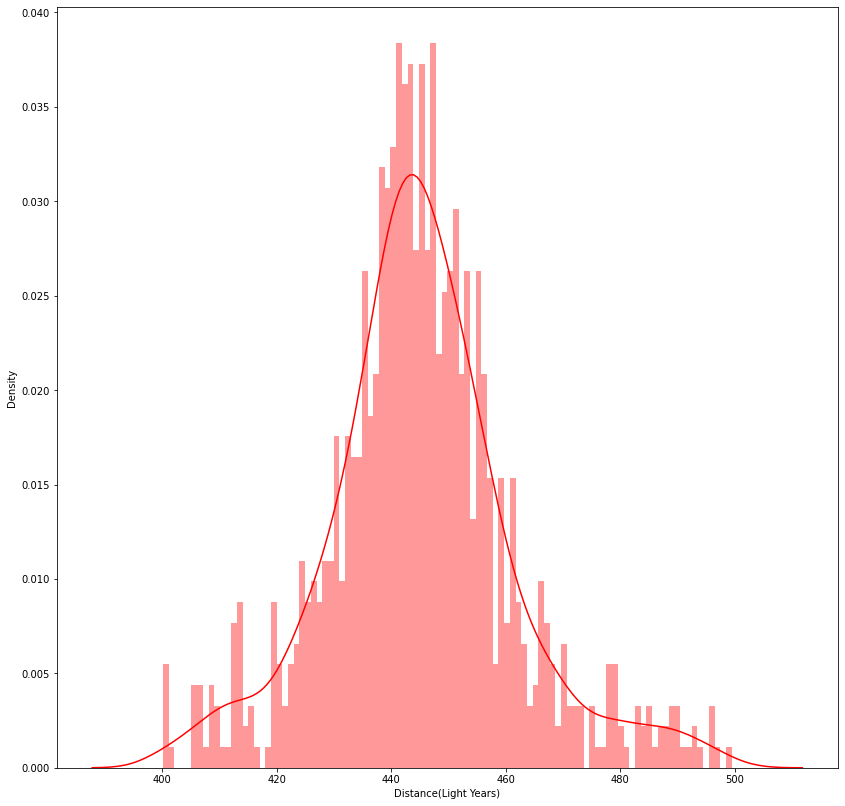

445.0184983541607 Light Years


In [15]:
LY1=list()
for i in range(len(LY)):
    if 400<LY[i]<500:
        LY1.append(LY[i])
LY1_n=np.asarray(LY1)

figA=plt.figure(figsize=(14,14))
sns.distplot(LY1_n,color='red',bins=100)
plt.xlabel("Distance(Light Years)")
plt.show()

print(np.average(LY1_n),"Light Years")

In [16]:
print("Following values are in Kelvin units")
print(np.average(T_k),np.average(teff_val),"average values of formula computed temperature and given temperature")
print(np.min(T_k),np.min(teff_val),"min values of formula computed temperature and given temperature")
print(np.max(T_k),np.max(teff_val),"max values of formula computed temperature and given temperature")

Following values are in Kelvin units
1089.4734282116847 4638.734852332361 average values of formula computed temperature and given temperature
994.9660929877634 3297.5 min values of formula computed temperature and given temperature
1297.4439278976438 9654.0 max values of formula computed temperature and given temperature


In [17]:
print("Following values are in R_sun units")
print(np.average(R_new),np.average(radius_val),"average values of formula computed radius and given radius")
print(np.min(R_new),np.min(radius_val),"min values of formula computed radius anf given radius")
print(np.max(R_new),np.max(radius_val),"max values of formula computed radius and given radius")

Following values are in R_sun units
11.972608989641598 0.8731431661111112 average values of formula computed radius and given radius
0.31718732121514315 0.5011681 min values of formula computed radius anf given radius
443.1565611845009 2.2105606 max values of formula computed radius and given radius


In [18]:
print("Following values are in L_sun units")
print(np.average(L_new),np.average(lum_val),"average values of formula computed luminosity and given luminosity")
print(np.min(L_new),np.min(lum_val),"min values of formula computed luminosity and given luminosity")
print(np.max(L_new),np.max(lum_val),"max values of formula computed luminosity and given luminosity")

Following values are in L_sun units
2.945544196071861 1.082361501767974 average values of formula computed luminosity and given luminosity
0.00011613191215645462 0.029161366 min values of formula computed luminosity and given luminosity
440.4849602556329 17.016182 max values of formula computed luminosity and given luminosity


In [19]:
#Projection problem with size as related to brightnes

In [20]:
brightness=np.max(gmag)-gmag

In [21]:
ra = (ra*np.pi)/180
for i in range(len(ra)):
    ra[i]=ra[i]%(2*np.pi)
    if ra[i]<0:
        ra[i]=ra[i]+2*np.pi
    if ra[i]>np.pi:
        ra[i]=ra[i]-2*np.pi
dec=(dec*np.pi)/180                        #.............................degs to radians
for i in range(len(dec)):
    dec[i]=dec[i]%np.pi
    if dec[i]<0:
        dec[i]=dec[i]+np.pi
    if dec[i]>np.pi/2:
        dec[i]=dec[i]-np.pi

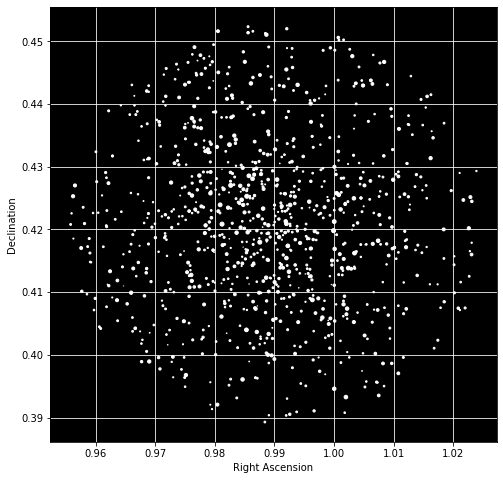

In [22]:
fig2=plt.figure(figsize=(8,8))
ax2=fig2.add_subplot(facecolor='black')
ax2.grid(c='white')
ax2.set_xlabel("Right Ascension")
ax2.set_ylabel("Declination")
plt.scatter(ra,dec,s=brightness,c='white')

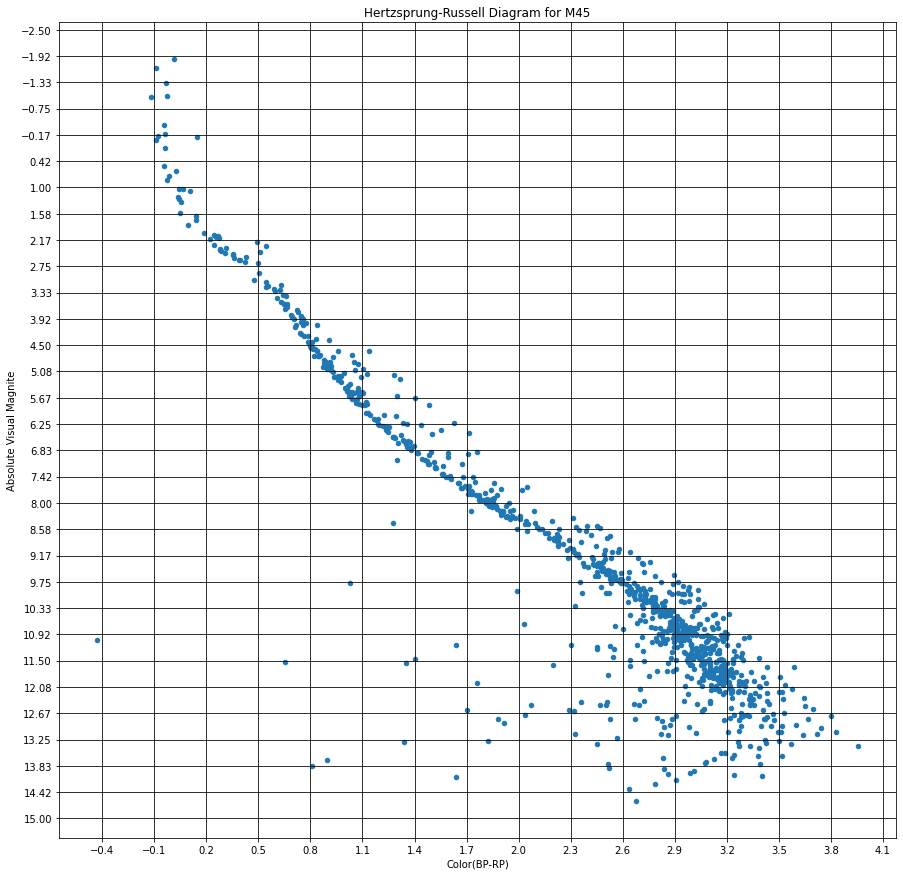

In [23]:
fig1,ax1=plt.subplots(figsize=(15,15))
ax1.invert_yaxis()
ax1.grid(c='black')
ax1.set_title("Hertzsprung-Russell Diagram for M45")
ax1.set_xticks(np.linspace(-1,5,21))
ax1.set_yticks(np.linspace(-2.5,15,31))
ax1.set_xlabel("Color(BP-RP)")
ax1.set_ylabel("Absolute Visual Magnite")
plt.scatter(bp_rp,M1_new,s=20,cmap='virdis')

In [24]:
#project to draw a colourmap based scatter pot for the HR diagram

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Hertzsprung-Russell Diagram'}>

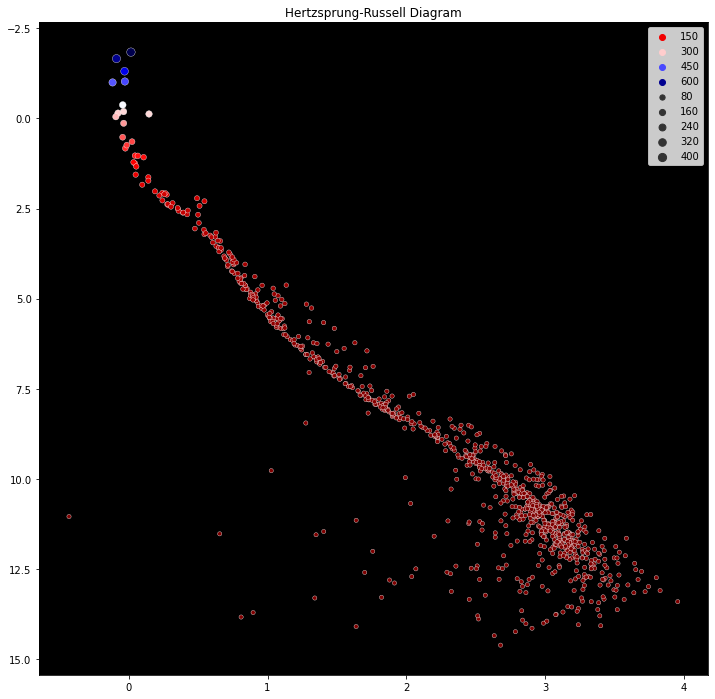

In [33]:
fig3=plt.figure(figsize=(12,12))
ax=plt.axes()
ax.set_facecolor('black')
ax.invert_yaxis()
ax.set_title("Hertzsprung-Russell Diagram")
sns.scatterplot(bp_rp,M1_new,hue=1.5*R_new,size=R_new,palette='seismic_r')

In [26]:
print("Effective colour turnoff for the above colour map occurs around 2.5--0.0 visual magnitude.")
print("This occurs in the age range of 1.6e8--1.9e9")
print("Upon comparison with the ZAMS,we get the turnoff point to around 2e8 years")

Effective colour turnoff for the above colour map occurs around 2.5--0.0 visual magnitude.
This occurs in the age range of 1.6e8--1.9e9
Upon comparison with the ZAMS,we get the turnoff point to around 2e8 years
